In [1]:
import os
import pkg_resources
pkg_resources.require("numpy>=`1.20.1")  #  to use specific numpy version
import numpy as np
import rsnapsim as rss
print('numpy version =', np.version.version)
print('rsnapsim version =',rss.__version__)
from sys import platform
import os
from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
from random import randrange
import os; from os import listdir; from os.path import isfile, join
import pandas as pd
import os; from os import listdir; from os.path import isfile, join
import re
import shutil
from random import randrange
# Importing rSNAPsim_IP
cwd = os.getcwd(); os.chdir('../../rsnaped'); import rsnaped as rsp ; os.chdir(cwd) # return to the working directory
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image

numpy version = 1.20.0
rsnapsim version = 0.0.18


In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

In [3]:
# gene files
gene_file_h2b = '../../DataBases/gene_files/H2B_withTags.txt'
gene_file_bact = '../../DataBases/gene_files/Bactin_withTags.txt'

In [4]:
# initial video
empty_cells_directory_name = '../../DataBases/videos_for_sim_cell'
#empty_cells_directory_name = '../../DataBases/test_videos/ran'

In [5]:
list_files_names = sorted([f for f in listdir(empty_cells_directory_name) if isfile(join(empty_cells_directory_name, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ empty_cells_directory_name+'/'+f for f in list_files_names ] # creating the complete path for each file
num_cell_shapes = len(path_files)
sel_shape = randrange(num_cell_shapes)
video_path = path_files[sel_shape]

In [6]:
# Inputs
inial_video = io.imread(video_path) # video with empty cell
list_gene_sequences = [gene_file_h2b, gene_file_bact] # path to gene sequences
list_number_spots = [30, 30] # list of integers, where each element represents the number of spots
list_target_channels = [1, 1] # channel where the simulated spots will be located. 
list_diffusion_coefficients =[1, 1] # diffusion coefficients for each gene
list_label_names = ['a','b'] # list of strings used to generate a classification field in the output data frame
simulation_time_in_sec = 1000
step_size_in_sec = 1
save_as_tif = 1 # option to save the simulated video
save_dataframe = 1 # option to save the simulation output as a dataframe in format csv. 
saved_file_name = 'simulated_cell' # if the video or dataframe are save, this variable assigns the name to the files
create_temp_folder = 1 # saves the video and data frame in a temp folder
save_as_gif = 1  # saves the video as .gif in a temp folder

In [7]:
tensor_video, dataframe_simulated_cell,list_ssa = rsp.SimulatedCellMultiplexing(inial_video,list_gene_sequences,list_number_spots,list_target_channels,list_diffusion_coefficients,list_label_names,simulation_time_in_sec,step_size_in_sec,save_as_tif, save_dataframe, saved_file_name,create_temp_folder,cell_number =0,save_as_gif=save_as_gif).make_simulation()

The output is saved in the directory: ./ temp
The output is saved in the directory: ./ temp
The output is saved in the directory: ./ temp
The output is saved in the directory: ./ temp


In [8]:
# Plot only selected trajectories
plt.rcParams['figure.figsize'] = [5,5]
#controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,dataframe_particles=dataframe_simulated_cell,normalize=False).make_video_app()
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,normalize=False,step_size_in_sec=step_size_in_sec).make_video_app()
display(VBox([controls_pr, output_pr]));

In [9]:
dataframe_simulated_cell

,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,x,y,Classification
0,0,0,0,91.771431,86.107140,0.0,95.104539,47.444631,0.0,266.0,242.0,a
1,0,0,1,98.241432,92.709999,0.0,86.290439,59.976717,0.0,265.0,241.0,a
2,0,0,2,86.262856,98.674286,0.0,91.121856,50.213641,0.0,264.0,241.0,a
3,0,0,3,59.965714,89.742859,0.0,67.527656,46.915242,0.0,265.0,241.0,a
4,0,0,4,61.174286,96.419998,0.0,85.200580,49.758305,0.0,265.0,242.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,59,995,0.000000,60.087143,0.0,106.727066,54.802613,0.0,275.0,327.0,b
29996,0,59,996,70.804283,63.150002,0.0,93.419268,51.180780,0.0,274.0,328.0,b
29997,0,59,997,33.017143,59.217144,0.0,75.515348,39.200849,0.0,274.0,328.0,b
29998,0,59,998,71.875717,74.217140,0.0,73.093440,51.632499,0.0,274.0,327.0,b


## Plotting time courses for gene 1

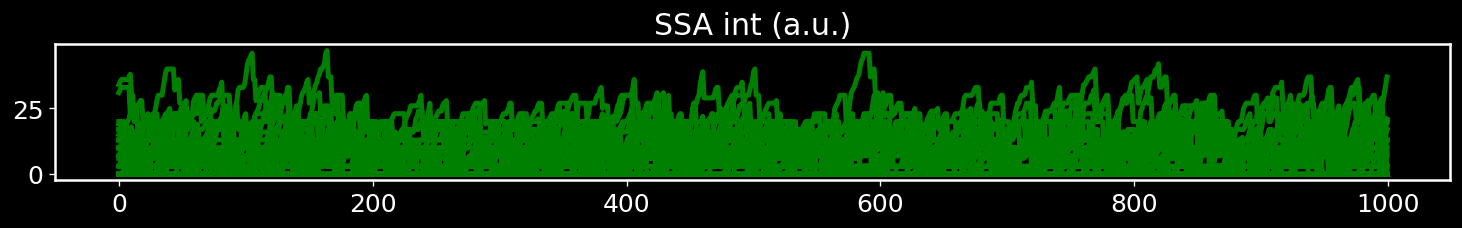

In [10]:
plt.figure(figsize=(15,1.5))
for tr in range(0,list_ssa[0].shape[0] ):
    plt.plot(list_ssa[0][tr,:] , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

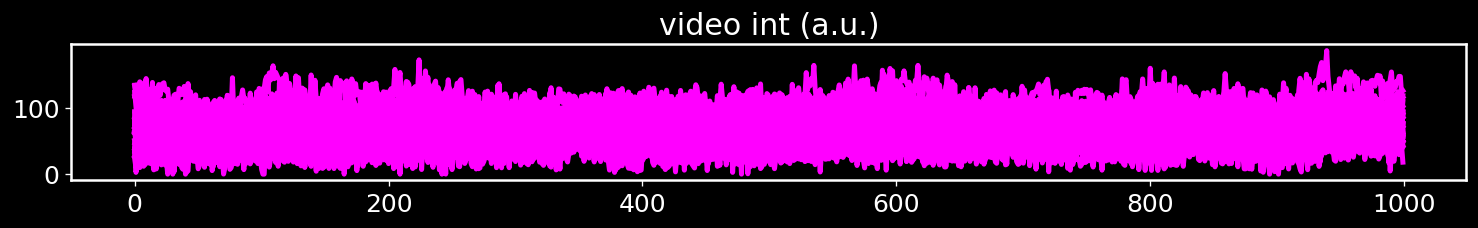

In [11]:
plt.figure(figsize=(15,1.5))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0]
        else:
            spot_num_counter = j
        plt.plot (dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='a') &  (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:] ,linewidth = 3,color='magenta' )      
plt.title('video int (a.u.)')
plt.show()

## Plotting time courses for gene 2

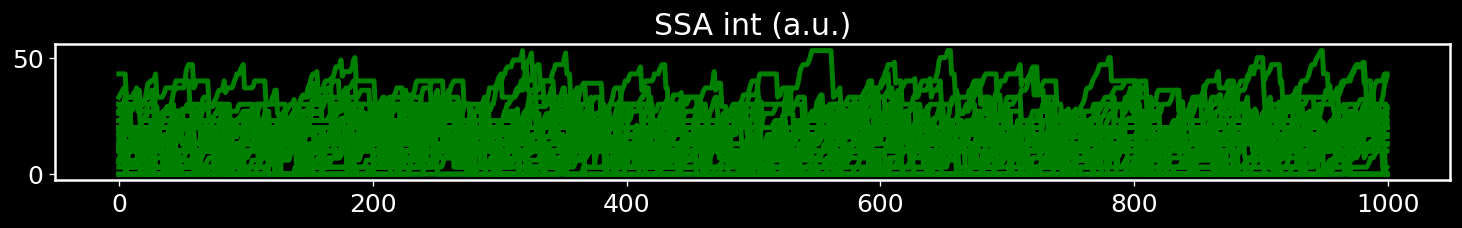

In [12]:
plt.figure(figsize=(15,1.5))
for tr in range(0,list_ssa[1].shape[0] ):
    plt.plot(list_ssa[1][tr,:] , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

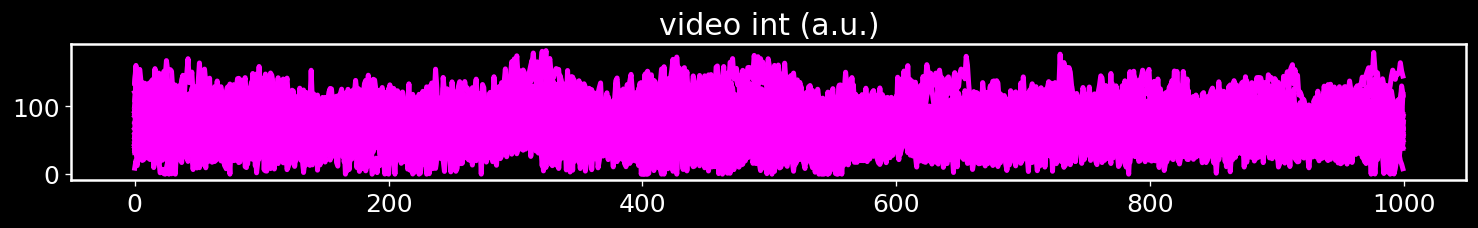

In [13]:
plt.figure(figsize=(15,1.5))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0] # this is just a counter for that creates the spot number based on list_number_spots
        else:
            spot_num_counter = j
        plt.plot (dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='b') &  (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:] ,linewidth = 3,color='magenta' )   
plt.title('video int (a.u.)')
plt.show()